<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Предосмотр-данных" data-toc-modified-id="Предосмотр-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предосмотр данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Исследовательский анализ</a></span></li><li><span><a href="#Подготовка-выборок-для-обучения-моделей" data-toc-modified-id="Подготовка-выборок-для-обучения-моделей-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Подготовка выборок для обучения моделей</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-дерева-решений" data-toc-modified-id="Модель-дерева-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель дерева решений</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Модель-CatBoost" data-toc-modified-id="Модель-CatBoost-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Модель CatBoost</a></span></li><li><span><a href="#Модель-LightGBM" data-toc-modified-id="Модель-LightGBM-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Модель LightGBM</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-дерева-решений" data-toc-modified-id="Модель-дерева-решений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель дерева решений</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Модель-CatBoost" data-toc-modified-id="Модель-CatBoost-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модель CatBoost</a></span></li><li><span><a href="#Модель-LightGBM" data-toc-modified-id="Модель-LightGBM-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Модель LightGBM</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Вячеслав! Меня зовут Марат, и я буду твоим ревьюером.  По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

**План проекта:**
- подготовим данные (проведем предобработку, исследовательский анализ и подготовим выборки)
- обучим модели
- проанализируем характеристики и качество моделей и выберем лучшую
- напишем вывод

In [1]:
# импорт всех нужных библиотек и метрик
import pandas as pd
import re
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
!pip install lightgbm
import lightgbm
print(lightgbm.__version__)
from sklearn.pipeline import Pipeline
import time

## Подготовка данных

### Предосмотр данных

In [2]:
auto = pd.read_csv('/datasets/autos.csv', parse_dates = ['DateCrawled', 'DateCreated', 'LastSeen'])

     

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


 

- Обрати внимание что ниже у cтолбцоы с датами тип данных определился некорректно (должен быть datetime64[ns]). Это легко поправить если использовать при чтении аргумент  parse_dates. Если у нас установлен верный тип данных, это значит что мы сможем легко вытаскивать информацию о годе, месяце, дня, времени, можем вычитать, прибавлять из столбца с датами другой столбец с датами, получая осмысленную информацию 




    
    



<div class="alert alert-info">
И правда, можно даже не исправлять после этого тип данных, а сразу все правильно вывести
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


(Там ещё есть такие аргументы как sep, desimal.  Если например в файле ошибочно вместо точки используется запятая для разделителя десятичных от целых,  то desimal = ',' числа прочтутся некорректно как текст...В общем всегда можно заглянуть в туториал любой функции посмотреть какие есть дополнительные аргументы) 

In [3]:
display(auto.head(10))
print(auto.info())
auto_shape = auto.shape
print(f'Размер датафрема: {auto_shape}')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17,0,27472,2016-03-31 17:17:06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int64         
 2   VehicleType        316879 non-null  object        
 3   RegistrationYear   354369 non-null  int64         
 4   Gearbox            334536 non-null  object        
 5   Power              354369 non-null  int64         
 6   Model              334664 non-null  object        
 7   Kilometer          354369 non-null  int64         
 8   RegistrationMonth  354369 non-null  int64         
 9   FuelType           321474 non-null  object        
 10  Brand              354369 non-null  object        
 11  Repaired           283215 non-null  object        
 12  DateCreated        354369 non-null  datetime64[ns]
 13  NumberOfPictures   354369 non-null  int64   

**Вывод по предосмотру данных:**
- нужно привести названия столбцов в норму
- тип столбцов с датой и временем - object, возможно придется его поменять
- в столбце NumberOfPictures на первый взгляд все значения - 0
- наблюдаются значения NaN
- наблюдаются пропуски

*Перед предобработкой исправим названия столбцов а так же удалим неинформативные столбцы*

In [4]:
# изменим названия столбцов 
auto = auto.rename(columns=lambda x: re.sub(r'(?<!^)([A-Z])', r'_\1', x).lower())
print(auto.columns)

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen'],
      dtype='object')



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


 
     
 можно сэкономить ручной труд воспользовавшись регуляризацией  
    
    
    df.rename(columns=lambda x: re.sub(r'(?<!^)([A-Z])', r'_\1', x).lower())     
     
     



<div class="alert alert-info">
подправил
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



так будет проще


 

*С названиями столбцов теперь все в порядке. Далее удалим неинформативные столбцы*

In [5]:
# сначала удалим категориальные неинформативные столбцы
auto = auto.drop(['postal_code', 'date_created', 
                  'last_seen', 'registration_month', 'date_crawled'], axis = 1)


# так же рассмотрим количественный столбец number_of_pictires, 
# который казался подозрительным в предосмотре данных
print(auto['number_of_pictures'].value_counts())

0    354369
Name: number_of_pictures, dtype: int64


*Видно столбец с количеством фотографий тут лишний, удалим его*

In [6]:
auto = auto.drop(['number_of_pictures'], axis = 1)

In [7]:
# проверим, что все неинформативные столбцы удалены
display(auto.head(1))

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN


###  Предобработка данных

*В предобработке стоит рассмотреть 3 момента:*

**1) Наличие пропусков**

In [8]:
print(auto.isna().sum())

price                    0
vehicle_type         37490
registration_year        0
gearbox              19833
power                    0
model                19705
kilometer                0
fuel_type            32895
brand                    0
repaired             71154
dtype: int64


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


 



Можно визуализировать пропуски с помощью библиотеки [missingno](https://www.dmitrymakarov.ru/data-analysis/nan-06/), выглядит красиво


Там кстати есть дополнительный функционал

    msno.heatmap(df)

Так можно посмотреть на корреляцию между пропусками в разных столбцах. В общем такой удобный инструмент для визуализации и анализа пропущенных значений
 

*Только в repaired пропуски занимают 20%, мы не можем позволить себе удалить все строки с пропусками, ведь тогда потеряем огромный объем информации. Поступим так: удалим только те строки, которые насчитывают 3 из 5 пропусков* 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюер</b></font>



Успех 👍:



Плюс за контроль


 

In [9]:
# удалим строки с пропусками
auto = auto.dropna(subset=['vehicle_type', 'fuel_type', 'model', 'repaired', 'gearbox'], thresh = 3)
print(auto.shape)
display(auto.head(10))

(336341, 10)


,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no
7,0,sedan,1980,manual,50,other,40000,petrol,volkswagen,no
8,14500,bus,2014,manual,125,c_max,30000,petrol,ford,NaN
9,999,small,1998,manual,101,golf,150000,NaN,volkswagen,NaN


*Разобрались с пропусками, так еще и огромный объем информации не потеряли*

**2) наличие явных дубликатов**

In [10]:
print(auto.duplicated().sum())

43440


*Наверное можно было бы поверить в совпадение некоторых строк - одинаковые машины конечно же есть, но вот совпадение пробега... В общем удалим все явные дубликаты*

In [11]:
auto = auto.drop_duplicates()
print(auto.duplicated().sum())

0


**3) Наличие неявных дубликатов в категориальных данных**

In [12]:
list_columns = []
auto_type = auto['vehicle_type'].dtype
for i in auto.columns:
    if auto[i].dtype == auto_type:
        list_columns.append(i)
for j in list_columns:
    print(auto[j].unique())
    print()
auto = auto.query("model != '601' and model != 'kalina' and model != 'range_rover_evoque' and model != 'rangerover' and model != 'serie_2' and model != 'trabant'")

[nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']

['manual' 'auto' nan]

['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'other' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'twingo' 'a_klasse' 'scirocco' '5er' 'meriva'
 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio' 'kadett'
 'kangoo' 'one' 'fortwo' '1er' 'b_klasse' 'signum' 'astra' 'a8' 'jetta'
 'polo' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156' 'escort'
 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'combo' 'focus' 'tt' 'corsa'
 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' 'z_reihe' 'sportage' 'sorento'
 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'insignia' 'a3' 'almera'
 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo' 'cordoba' 'colt'
 'impreza' 'vectra' 'berlingo' 'tiguan' 'i_reihe' 'sharan' '6_reihe'
 'panda' 'up' 'seicento' 'ceed' '5_reihe' 'yeti' 'octavia' 'mii'
 'rx_reihe' '6er' 'modus' 'fox' 'matiz' 'beetle' 'rio' 'touareg' 'logan'
 'spider' 'cuore' 's_max' 'a2' 'galaxy' 'c3' 'viano' 's_klass

*По неявным дубликатам можно заметить в столбце тип топлива значения petrol и gasoline - они по факту одинаковые, так что перезапишем эти значения*

In [13]:
auto['fuel_type'].replace({'gasoline' : 'petrol'}, inplace = True)
print(auto['fuel_type'].unique())

['petrol' nan 'lpg' 'other' 'hybrid' 'cng' 'electric']


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера </b></font>



Успех 👍:



👍


 

**1.1) Наличие пропусков**

*Теперь заполним пропуски значениями other или unknow, в зависиимости от того, что больше подойдет по смыслу*

In [14]:
auto['vehicle_type'].fillna('other', inplace = True)

auto['fuel_type'].fillna('other', inplace = True)

auto['model'].fillna('other', inplace = True)

auto['repaired'].fillna('unknow', inplace = True)

auto['gearbox'].fillna('unknow', inplace = True)

 
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


 
Вполне допустимый вариант заполнения пропусков. 


 

<div class="alert alert-warning">



Совет 🤔:


 
- Вообще работа с пропусками тема очень тонкая, ведь в любом случае будет происходить искажение данных, каждый новый датасетом скорее всего надо будет требовать какой-то свой уникальный способ работы с пропусками, а как именно - это придёт с опытом. Тут можешь посмотреть какие вообще способы и подходы можно использовать  [первая часть](https://www.dmitrymakarov.ru/data-analysis/nan-06/) ,   [вторая часть](https://www.dmitrymakarov.ru/data-analysis/nan-06-2/) 
 
 
- Хотя это лучше было сделать в pipeline, используя SimpleImpute - удобство в том что при прогнозе на реальных данных нам не пришлось бы в них заполнять пропуски, мы бы сразу применили  pipeline, в котором уже всё есть
 

In [15]:
print(auto.shape)

(292576, 10)


**Вывод по предобработке данных:**
- Названия столбцов были преведены в норму
- Неиформативные столбцы были удалены
- Были обработаны
    - пропуски
    - явные дубликаты
    - неявные дубликаты
- Размер таблицы теперь составляет 292901 строк на 10 столбцов  

### Исследовательский анализ

*Этот этап нужен нам для того, чтобы обработать аномальные значения в количественных данных*

count    292576.000000
mean       4631.409856
std        4597.637684
min           0.000000
25%        1200.000000
50%        2950.000000
75%        6750.000000
max       20000.000000
Name: price, dtype: float64

0       6847
1500    4240
500     4226
1200    3541
1000    3511
        ... 
2965       1
4758       1
8080       1
3730       1
8188       1
Name: price, Length: 3675, dtype: int64


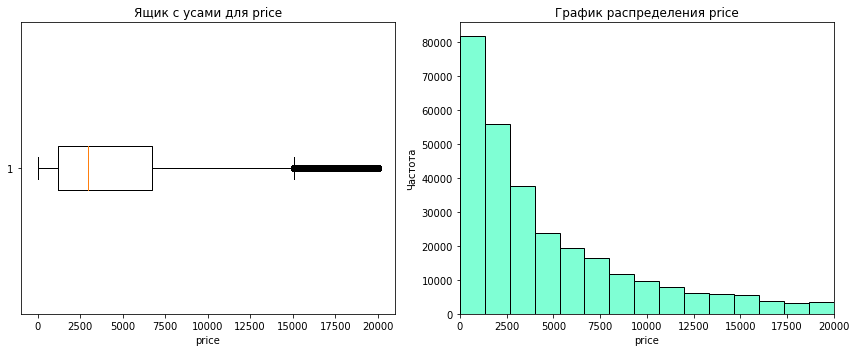

count    292576.000000
mean       2003.186451
std          25.660402
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9000.000000
Name: registration_year, dtype: float64

1999    18602
2000    18127
2005    17985
2001    17059
2006    16952
        ...  
1944        1
1946        1
1947        1
1949        1
1000        1
Name: registration_year, Length: 108, dtype: int64


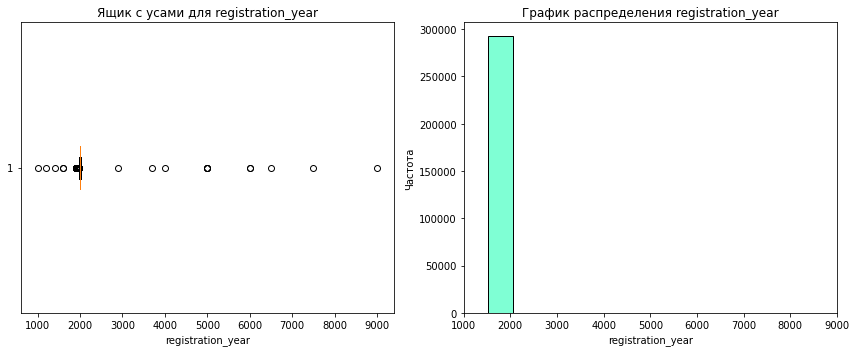

count    292576.000000
mean        114.256053
std         201.840695
min           0.000000
25%          75.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: power, dtype: float64

0        26986
75       18722
150      12328
60       12312
90       10869
         ...  
3199         1
1405         1
1149         1
11011        1
2172         1
Name: power, Length: 700, dtype: int64


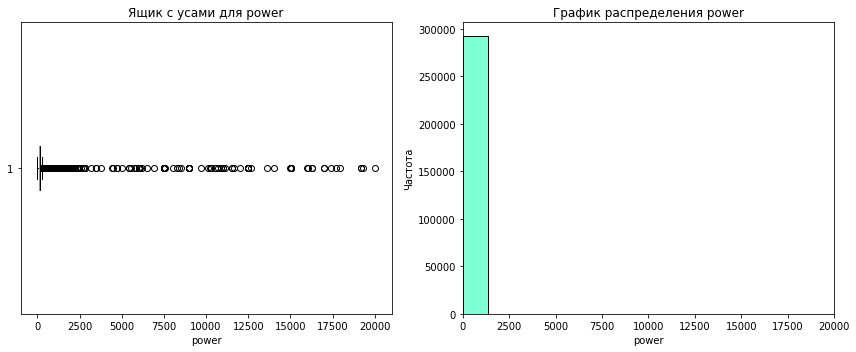

count    292576.000000
mean     127717.481953
std       37567.191750
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

150000    192671
125000     31718
100000     12816
90000      10237
80000       8875
70000       7732
60000       6455
50000       5496
40000       4302
5000        4062
30000       3845
20000       3399
10000        968
Name: kilometer, dtype: int64


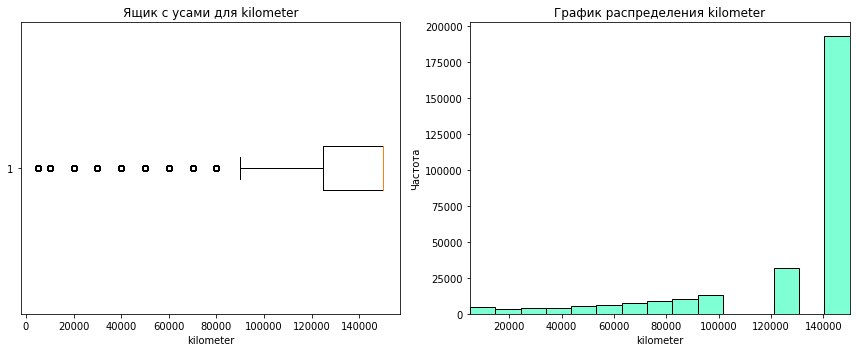

In [16]:
# построим графики распределения и ящики с усами 
int_columns = auto['price'].dtype
for i in auto.columns:
    if auto[i].dtype == int_columns:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        print(auto[i].describe())
        print()
        print(auto[i].value_counts())

        # Ящик с усами
        ax1.boxplot(auto[i], vert=False)
        ax1.set_title(f'Ящик с усами для {i}')
        ax1.set_xlabel(i)

        # Гистограмма
        ax2.hist(auto[i], bins=15, color='aquamarine', edgecolor='black')
        ax2.set_xlim(auto[i].min(), auto[i].max() + 0.5)
        ax2.set_title(f'График распределения {i}')
        ax2.set_xlabel(i)
        ax2.set_ylabel('Частота')

        plt.tight_layout() 
        plt.show()
        
        

*Теперь по порядку*


<div class="alert alert-success">
<font size="5">
<b>Комментарий ревьюера</b></font>





Успех:

Верно что для количественных признаков использованы как гистограммы, так и ящика с усами, плюс за использование subplots -   стоит стремиться к лаконичному представлению графиков
    
    
    
<div class="alert alert-warning">


Совет 🤔:

 
 
- я   бы тебе советовал использовать библиотеку    [seaborn](https://nagornyy.me/it/vizualizatsiia-dannykh-v-seaborn/), она строит  симпатичнее и проще matplotlib

 
    

<div class="alert alert-info">
Хорошо, в следующих проектах думуаю что прибегну к этому! Сейчас просто очень спешу, что успеть все к дедлайну, так что постараюсь делать только необходимые изменения
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Всё что жёлтым это по желанию


 

**1) price**

In [17]:
# удалим те строки, где цена равна 0
auto = auto.query('price > 0')
print(auto['price'].value_counts())

1500     4240
500      4226
1200     3541
1000     3511
2500     3490
         ... 
10791       1
4759        1
2965        1
4758        1
8188        1
Name: price, Length: 3674, dtype: int64


**2) registration_year**

In [18]:
# здесь рассмотрим поподробней
print(auto['registration_year'].unique())

[1993 2011 2004 2001 2008 1995 2014 1998 2005 1910 2007 2009 2002 2018
 1997 1990 2017 1981 2003 2016 1994 1991 1984 2006 1999 2012 2010 2000
 1992 2013 1996 1989 2015 1985 1982 1976 1983 1973 1969 1971 1987 1986
 1988 1980 1965 1970 1945 1974 1979 1955 1978 1972 1968 1977 1961 1966
 1975 1963 1964 1958 1967 1959 1956 1941 1960 1962 1929 1957 1940 1949
 1937 1951 1953 2019 1954 2900 6000 1400 1950 4000 1948 1952 1932 3700
 5000 1942 1935 1933 1936 6500 1923 1930 1943 1934 1938 1000 1928 1931
 1602 1927 1947 1946 1944 1600]


*Опираясь на информацию с интернета, первые современные автомобили стали появляться в 1900 году, так что временный интервал будет начинаться в 1900 году, а заканчиваться нынешним*

In [19]:
auto = auto.query('1900 <= registration_year <= 2016')
print(auto['registration_year'].unique())

[1993 2011 2004 2001 2008 1995 2014 1998 2005 1910 2007 2009 2002 1997
 1990 1981 2003 2016 1994 1991 1984 2006 1999 2012 2010 2000 1992 2013
 1996 1989 2015 1985 1982 1976 1983 1973 1969 1971 1987 1986 1988 1980
 1965 1970 1945 1974 1979 1955 1978 1972 1968 1977 1961 1966 1975 1963
 1964 1958 1967 1959 1956 1941 1960 1962 1929 1957 1940 1949 1937 1951
 1953 1954 1950 1948 1952 1932 1942 1935 1933 1936 1923 1930 1943 1934
 1938 1928 1931 1927 1947 1946 1944]


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


 

- Тут есть небольшая хитрость.  Чтобы понять границу сверху, нужно было посмотреть на дату регистрации. А сверху он ограничен 2016 годом 3 месяца. Так что получается  2016 год граница сверху. Если есть строчка с больше 2016, то это   ошиибка заполнения клиента, такое лучше убрать. А снизу я бы взял эпоху массовых авто, всё что до него - это скорее всего раритетные автомобили, ценообразование на которых имеет совсем другую природу, поэтому их можно рассмотреть в качестве аномалий которые мы убираем из анализа    
     

<div class="alert alert-info">
Ах да, а я и не заметил
</div>

**3) power**

*Опираясь на информацию с интернета, максимальная мощность для машин доходит до 2000 лошадиных сил, а минимальная - от 50, так что оставим значения в этом интервале*

In [20]:
auto = auto.query('50 <= power <= 2000')
print(auto['power'].min(), auto['power'].max())

50 2000


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Есть работа с аномалиями в цене и мощности


 

**4) kilometer**

*В столбце пробег ничего исправлять не нужно. Максимальное расстояние доходит до 150 тыс км, что приемлимо*

In [21]:

display(auto.head(10))
print(auto.shape)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
1,18300,coupe,2011,manual,190,other,125000,petrol,audi,yes
2,9800,suv,2004,auto,163,grand,125000,petrol,jeep,unknow
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,petrol,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no
8,14500,bus,2014,manual,125,c_max,30000,petrol,ford,unknow
9,999,small,1998,manual,101,golf,150000,other,volkswagen,unknow
10,2000,sedan,2004,manual,105,3_reihe,150000,petrol,mazda,no
11,2799,wagon,2005,manual,140,passat,150000,petrol,volkswagen,yes


(248579, 10)


*Заменим все категориальные данные на количественные (бинарные)*

 
<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:


 - .get_dummies  вполне рабочий инстурмент, но для машинного обучения стоит использовать к OHE.  Почему OHE лучше можно почитать [тут](
https://albertum.medium.com/preprocessing-onehotencoder-vs-pandas-get-dummies-3de1f3d77dcc), а [с кодами тут](https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing#scrollTo=organized-pierce) 


Главная идея при использовании OHE -  кодирование до деления на выборки (test/train) приводит к утечке данных, поэтому используем OHE после train_test_split. Как в случаи с тем же  StandardScaler делаем .fit_transform на train,  .transform на test/valid    


 

<div class="alert alert-info">
Понял
</div>

In [22]:
auto = auto.drop_duplicates().reset_index(drop=True)

**Вывод по исследовательскому анализу:**
- обработали аномальные значения, оставив строки с
    - ценой, **не равной 0 евро**
    - датой регистрации, в интервале **с 1900 по 2024 года** 
    - мощностью, в интервале **от 50 до 2000 лошадинах сил**
- в конечном итоге получили датафрейм размером **255_717 строк на 307 столбцов**. Строк стало примерно **на 100_000 меньше**, что составляет чуть больше **25%** из изначального датафрейма, но не убирать все эти строки было нельзя. Столбцы увеличились за счет того, что мы преобразовали категориальные данные в количественные
    
    

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:

 


- Ниже ты используешь линейную модель. В этом случае рекомендуется провести предварительную проверку на  мультиколлинеарность. А что бы порекомендовал использовать библиотеку phik,  чтобы оценить степень корреляции между категориальными признаками.  Ведь наш проект в том числе про скорость, а по phik  можно обнаружить высокую связь между двумя категориальными признаками, и без потери в качестве метрики убрать один



 


<div class="alert alert-warning">


Совет 🤔:


 

 



- в этом проекте стоит вопрос о выборе модели в том числе на основе затраченного времени, можно попробовать ускориться,  ссжав датасет, приведя его в более экономный тип, с помощью функции которая гуляет на просторах интернета

    
    # Оптимизация числовых типов данных
    def optimize_memory_usage(df: pd.DataFrame, print_size: bool=True) -> pd.DataFrame:
        '''
        Function optimizes memory usage in dataframe
        df: pd.DataFrame - data table
        print_size: bool - display of optimization results
        return pd.DataFrame - amount of optimized memory
        '''
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # Типы, которые будем проверять на оптимизацию
        # Размер занимаемой памяти до оптимизации (в Мб)
        before_size = df.memory_usage().sum() / 1024**2    
        for column in df.columns:
            column_type = df[column].dtypes
            if column_type in numerics:
                column_min = df[column].min()
                column_max = df[column].max()
                if str(column_type).startswith('int'):
                    if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                        df[column] = df[column].astype(np.int8)
                    elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                        df[column] = df[column].astype(np.int16)
                    elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                        df[column] = df[column].astype(np.int32)
                    elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                        df[column] = df[column].astype(np.int64)  
                else:
                    if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                        df[column] = df[column].astype(np.float32)
                    else:
                        df[column] = df[column].astype(np.float64)    
        # Размер занимаемой памяти после оптимизации (в Мб)
        after_size = df.memory_usage().sum() / 1024**2
        if print_size: print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
                             .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
        return df
                                                                                                   
                                                                                                   
Проверяет минимальное и максимальное значения в столбце. Если значения могут уместиться в типе данных меньшего размера (например, np.int8 вместо np.int16), столбец конвертируется в более компактный тип данных. И для оценки стоило всё это начинать, подсчитывается размер занимаемой памяти DataFrame до и после оптимизации и выводит разницу в процентах

<div class="alert alert-info">
Доработал
</div>

In [23]:
! pip install phik
import phik
auto.phik_matrix().style.background_gradient(cmap ='coolwarm')

interval columns not set, guessing: ['price', 'registration_year', 'power', 'kilometer']


,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
price,1.000000,0.257857,0.464143,0.274539,0.239357,0.567391,0.312681,0.104903,0.356854,0.348696
vehicle_type,0.257857,1.000000,0.165699,0.234940,0.127564,0.908420,0.189455,0.153182,0.630393,0.150930
registration_year,0.464143,0.165699,1.000000,0.076703,0.077810,0.552858,0.435332,0.068479,0.298107,0.268893
gearbox,0.274539,0.234940,0.076703,1.000000,0.258020,0.616854,0.070124,0.132776,0.515188,0.135616
power,0.239357,0.127564,0.077810,0.258020,1.000000,0.423683,0.025004,0.068054,0.260024,0.035223
model,0.567391,0.908420,0.552858,0.616854,0.423683,1.000000,0.442580,0.324710,0.997647,0.225329
kilometer,0.312681,0.189455,0.435332,0.070124,0.025004,0.442580,1.000000,0.085290,0.268246,0.241035
fuel_type,0.104903,0.153182,0.068479,0.132776,0.068054,0.324710,0.085290,1.000000,0.196530,0.156786
brand,0.356854,0.630393,0.298107,0.515188,0.260024,0.997647,0.268246,0.196530,1.000000,0.134835
repaired,0.348696,0.150930,0.268893,0.135616,0.035223,0.225329,0.241035,0.156786,0.134835,1.000000


*Наблюдается маленькая зависимость между price и fuel_type (0.1), но даже такую зависимость я бы не исключал*

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Действительно исключать не стоит, ведь сложно нелинейной модели могут учесть более сложные зависимости чем показывает матрица корреляции. К тому же Матрица корреляция показывает связь между признаком и таргетом.  А модель может учесть сложную связь сразу нескольких признаков и таргета.  то есть отдельно признаки могут быть не полезными,  а в комбинации очень даже
    
Ну вот на что стоило обратить внимание это на высокую корреляцию между брендом и моделью.  По сути они дублируют друг друга, поэтому для ускорения обучения прогнозирования можно было попробовать дропнуть один  из  

In [24]:
def optimize_memory_usage(df: pd.DataFrame, print_size: bool=True) -> pd.DataFrame:
    '''
    Function optimizes memory usage in dataframe
    df: pd.DataFrame - data table
    print_size: bool - display of optimization results
    return pd.DataFrame - amount of optimized memory
    '''
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
    before_size = df.memory_usage().sum() / 1024**2    
    for column in df.columns:
        column_type = df[column].dtypes
        if column_type in numerics:
            column_min = df[column].min()
            column_max = df[column].max()
            if str(column_type).startswith('int'):
                if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                    df[column] = df[column].astype(np.int8)
                elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                    df[column] = df[column].astype(np.int16)
                elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)
                elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                    df[column] = df[column].astype(np.int64)  
            else:
                if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                    df[column] = df[column].astype(np.float32)
                else:
                    df[column] = df[column].astype(np.float64)    
    # Размер занимаемой памяти после оптимизации (в Мб)
    after_size = df.memory_usage().sum() / 1024**2
    if print_size: print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
                         .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
    return df


In [25]:
optimize_memory_usage(auto)

Размер использования памяти: до 18.90 Mb - после 13.71 Mb (27.5%)


,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,18300,coupe,2011,manual,190,other,125000,petrol,audi,yes
1,9800,suv,2004,auto,163,grand,125000,petrol,jeep,unknow
2,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
3,3600,small,2008,manual,69,fabia,90000,petrol,skoda,no
4,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
...,...,...,...,...,...,...,...,...,...,...
247783,5250,other,2016,auto,150,159,150000,other,alfa_romeo,no
247784,3200,sedan,2004,manual,225,leon,150000,petrol,seat,yes
247785,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
247786,9200,bus,1996,manual,102,transporter,150000,petrol,volkswagen,no


### Подготовка выборок для обучения моделей

In [26]:
from sklearn.preprocessing import OneHotEncoder
# разделяем выборки
RANDOM_STATE = 12345
TEST_SIZE = 0.25
X = auto.drop(['price'], axis = 1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = TEST_SIZE,
                                                   random_state = RANDOM_STATE)
# Определяем категориальные и числовые признаки
categorical_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'repaired']
numerical_features = ['registration_year', 'power', 'kilometer']

# Применяем One-Hot Encoding к категориальным признакам в обучающей выборке
ohe = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = ohe.fit_transform(X_train[categorical_features])
X_test_encoded = ohe.transform(X_test[categorical_features])

# Создаем DataFrame для закодированных признаков
X_train_encoded = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names(categorical_features))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=ohe.get_feature_names(categorical_features))


print(X_train_encoded.head())



   vehicle_type_convertible  vehicle_type_coupe  vehicle_type_other  \
0                       0.0                 0.0                 0.0   
1                       0.0                 0.0                 0.0   
2                       0.0                 0.0                 0.0   
3                       0.0                 0.0                 0.0   
4                       0.0                 1.0                 0.0   

   vehicle_type_sedan  vehicle_type_small  vehicle_type_suv  \
0                 0.0                 1.0               0.0   
1                 0.0                 0.0               0.0   
2                 1.0                 0.0               0.0   
3                 0.0                 0.0               1.0   
4                 0.0                 0.0               0.0   

   vehicle_type_wagon  gearbox_manual  gearbox_unknow  model_145  ...  \
0                 0.0             1.0             0.0        0.0  ...   
1                 0.0             1.0           

In [27]:
# масштабируем признаки
scaler = StandardScaler()
scaler.fit(X_train_encoded)  
X_train_scaled = scaler.transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)     

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns)


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Старый добрый StandardScaler и OneHotEncoder


 <div class="alert alert-warning">
 
Совет:


- .fit_transform на train датасете, .transform на test. Вроде все верно, но после ты подаешь данные  в GridSearchCV или cross_val_score и он внутри себя разбивая его на тренировочный и валидационный датасет, получается подглядывание в будущее (утечка данных). Решение в использовании pipeline 
    
    
Ведь когда   мы используем вручную прописанный цикл для поиска гиперпарамтеров, и разбиваем на три датасета, то мы же делаем так (пусть тут будет предобработка тольбко  StandardScaler):
    


    scaler = StandardScaler()
    scaler.fit(train_feat[numeric])


    feat_train[numeric] = scaler.transform(feat_train[numeric])
    feat_test[numeric] = scaler.transform(feat_test[numeric])
    feat_valid[numeric] = scaler.transform(feat_valid[numeric])
    
    
    
То есть мы делаем   .fit на train, а на valid и test делаем   .transform, то есть когда мы обучаем наш StandardScaler,  мы используем только тренировочный датасет, а затем "распростроняем" выученное шкалирование на test/valid.  Нет подглядывания:   Мы не используем информацию из тестового и валидационного датасета, для того чтобы обучить StandardScaler(). В этом и смысл моделирования - мы как будто бы знаем только train, а тестового для нас как бы не существует.  Если мы при шкалировании начинаем использовать информацию из теста мы поступаем нечестно. 

    
    
А когда используем GridSearch
    
    
Вот твой код (условно)    
    
    scaler = StandardScaler()
    scaler.fit(train_feat)
    feat_train = scaler.transform(feat_train)    
    
    
    parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters)
    clf.fit(feat_train, target)
    
    
    
Обрати внимание - ты подал  feat_train, из  которого   GridSearchCV сам создаст valid и train и построит циклы. И вот тут оказывается что валидационный датасет у нас с подглядыванием, потому что на всем feat_train был сделан fit.  Вот в чём заключается подглядывание.  И раз GS делает валидационные внутри себя, спрашивается как добраться до нее и избежать подглядывания в будущее? Казалось бы никак, но нет! Pipeline! ) 
    
    
  
    
И вот как надо сделать pipeline чтобы не было утечки данных при шкалировании.  Как видишь кода немного 
    
    pipe = Pipeline([
            ('scale', StandardScaler(random_state = 42)),
            ('clf', SVC(kernel = 'linear', C = 1))])

    parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

    clf = GridSearchCV(pipe, parameters)
    clf.fit(feat_train, target)
    
    
И теперь    feat_train будет разбит на train и valid, но .fit будет на train, а на valid будет .transform. Такй вот хитрый pipeline - он суёт свои ручки внутрь GS и делай так чтобы не было утечки данных.
    
    
    
    
    


И вы тоже самое что я писал о GridSearchCV, касается cross_val_score, который ты использовал ниже


## Обучение моделей

### Модель линейной регрессии

In [28]:
# Обучим модель линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Получаем предсказания на валидационной выборке
predictions_test = model.predict(X_test_scaled)

# Также можно использовать кросс-валидацию для оценки модели
cv_scores = cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_cv = (-cv_scores) ** 0.5
print(f'RMSE с использованием кросс-валидации: {rmse_cv.mean()}')


RMSE с использованием кросс-валидации: 4379.22344402072


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Ошибка:


Вот это стоило убрать    
    
    # Находим RMSE на валидационной выборке
    rmse_lr = mean_squared_error(y_test, predictions_test) ** 0.5
    print(f'RMSE на валидационной выборке: {rmse_lr}') 
    
    
Во-первых это не Метрика на валидации.  Это Метрика на тестовой,  которые мы смотрим только один раз, для лучшей модели, в самом конце
    
    
Импорты стоит собирать вместе, а не разбрасывать по всему проекту   
    
    
И   интересно почему у тебя такая плохая Метрика, тут обычно получают что-то около 2200    

<div class="alert alert-info">
Убрал. Да, я и сам удивился такой плохой метрике
</div>

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:



Тут у тебя нарушена логика использования выборок.  Тренировочную выборку мы используем для обучения модели, а метрику смотрим по валидационной (  Можно создать её вручную, но лучше использовать cross_val_score)


<div class="alert alert-info">
Доработал
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Совет 🤔:


Я бы ещё заметил что шкалирование стоило проводить не для всех признаков, а только для количественных.  Хотя вряд ли это могло ухудшить так метрику

### Модель дерева решений

 


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


- По поводу использования Scaler и OHE и OrdinalEncoder: fit мы не делаем на всей выборки. fit всегда делаем на тренировочной выборке. И это легко объяснить, ведь по логике моделирования мы владеем информацией только из тренировочной выборки. Поэтому "обучаемся" (fit_transform/fit) на тренировочной, а  затем "распространяем" обученный scaler/encoder/итд на test/valid/реальные данные на которых делает прогноз 
    
    
- OE применяем К категориальным признакам. Разве    power итд это категориальные признаки? 

In [29]:
X_oe = auto.drop(['price'], axis=1)
y_oe = auto['price']

# Разделяем данные на тренировочную и тестовую выборки
X_train_oe, X_test_oe, y_train_oe, y_test_oe = train_test_split(
    X_oe,
    y_oe,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

# Определяем категориальные признаки
categorical_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'repaired']




In [30]:


# Создаем пайплайн
pipeline = Pipeline(steps=[
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),  
    ('model', DecisionTreeRegressor(random_state=RANDOM_STATE))  # Модель дерева решений
])

# Определяем параметры для GridSearchCV
param_grid = {
    'model__max_depth': range(1, 10)  # Параметры для подбора
}

# Создаем GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error')


# Время обучения
start_time = time.time()
# Обучаем модель
grid_search.fit(X_train_oe, y_train_oe)
end_time = time.time()


# Получаем лучшие параметры и RMSE
best_model = grid_search.best_estimator_
best_rmse = -grid_search.best_score_
print(f'Лучшие гиперпараметры: {grid_search.best_params_}')
print(f'Лучший RMSE на валидации: {best_rmse}')

# Выводим время обучения
print(f"Время обучения: {end_time - start_time} секунд")

# Предсказания на тестовой выборке
'''predictions_test = best_model.predict(X_test_oe)
test_rmse = mean_squared_error(y_test_oe, predictions_test) ** 0.5
print(f'Test RMSE: {test_rmse}')'''

Лучшие гиперпараметры: {'model__max_depth': 9}
Лучший RMSE на валидации: 2075.917696511765
Время обучения: 23.87956190109253 секунд


"predictions_test = best_model.predict(X_test_oe)\ntest_rmse = mean_squared_error(y_test_oe, predictions_test) ** 0.5\nprint(f'Test RMSE: {test_rmse}')"

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍Pipeline, здорово что   ускорил расчёты за счёт OE, и Метрика получилась вполне приличной
 
    
best_score_     
    
<div class="alert alert-warning">


Совет 🤔:


    
    
    # Время обучения
    start_time = time.time()
    # Обучаем модель
    grid_search.fit(X_train_oe, y_train_oe)
    end_time = time.time()

 
Получается ты замерил   время когда модель обучается на разных гиперпараметрах. Во-первых размах переборов у разных моделей может быть разной,  и получается что модель может обучаться дольше просто потому что ты делаешь переборы глубже. Во-вторых в продакшн модель   мы будем использовать уже модель с найдеными лучшими гиперпараметрами, поэтому время за которое модель обучается с перебором нас мало интересует. Так что получается не совсем корректно 
Так что лучше бы ты достал время как сделал это ниже, из GS

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:



Лучший гиперпараметры подбираем по метрике на валидации.  И непонятно почему ты используешь ручной цикл, ведь вы проходи GridSearhCV + pipeline. Первый инструмент позволяет автоматизировать поиск гиперпараметров, а второй позволяет избежать утечки данных


<div class="alert alert-info">
Исправил
</div>

*При увеличении глубины rmse падает, но когда в игру вступят наши тестовые данные, мы получим очень плохую точность. Поэтому предлагаю выбрать в качестве глубины дерева значение 7*

### Модель случайного леса

In [31]:
# обучим модель случайного леса, перебирая n_estimators через цикл
'''arr = [100, 500]
for n in arr:
    model = RandomForestRegressor(random_state = RANDOM_STATE, n_estimators = n, max_depth = 7)
    model.fit(X_train, y_train)
    predictions_oe_2 = model.predict(X_train)
    rmse_rfr = mean_squared_error(y_train, predictions_oe_2) ** 0.5
    print(f'rmse_rfr = {rmse_rfr} c n_estimators = {n}')'''

"arr = [100, 500]\nfor n in arr:\n    model = RandomForestRegressor(random_state = RANDOM_STATE, n_estimators = n, max_depth = 7)\n    model.fit(X_train, y_train)\n    predictions_oe_2 = model.predict(X_train)\n    rmse_rfr = mean_squared_error(y_train, predictions_oe_2) ** 0.5\n    print(f'rmse_rfr = {rmse_rfr} c n_estimators = {n}')"

*Модель случайного леса учится дольше 5 минут, так еще и имеет rmse = 2164. Такая модель нам не годится, но я оставлю ее в комментариях, чтобы показать, что ее я тоже учитывал при решении*

### Модель CatBoost

In [32]:
# Разделяем данные на тренировочную и временную выборки
features_train, features_temp, target_train, target_temp = train_test_split(
    auto.drop('price', axis=1), auto.price, test_size=0.3, random_state=RANDOM_STATE
)

# Теперь делим временную выборку на валидационную и тестовую
features_valid, features_test, target_valid, target_test = train_test_split(
    features_temp, target_temp, test_size=0.5, random_state=RANDOM_STATE
)

# Определяем категориальные признаки
categorical_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'repaired']

# Перебор значений глубины дерева
for j in range(1, 10, 2):
    model_cbr = CatBoostRegressor(loss_function='RMSE', iterations=300, depth=j,
                                   cat_features=categorical_features, verbose=10)

    # Время обучения
    start_time = time.time()
    # Обучаем модель
    model_cbr.fit(features_train, target_train)
    end_time = time.time()

    print(f"Время обучения для depth={j}: {end_time - start_time} секунд")

    # Время предсказания на валидационной выборке
    start_time = time.time()
    predictions_valid = model_cbr.predict(features_valid)
    end_time = time.time()
    
    # Выводим время предсказания
    print(f"Время предсказания для depth={j}: {end_time - start_time} секунд")

    # Вычисляем RMSE для валидационной выборки
    rmse_cbr = mean_squared_error(target_valid, predictions_valid) ** 0.5
    print(f'RMSE для depth={j} на валидационной выборке: {rmse_cbr}')

# Дополнительно можно оценить модель на тестовой выборке после завершения всех итераций
# Например, для лучшего значения depth:
best_depth = 3  
model_cbr_best = CatBoostRegressor(loss_function='RMSE', iterations=300, depth=best_depth,
                                    cat_features=categorical_features, verbose=10)

model_cbr_best.fit(features_train, target_train)
predictions_test = model_cbr_best.predict(features_test)
rmse_test = mean_squared_error(target_test, predictions_test) ** 0.5

print(f'RMSE для depth={best_depth} на тестовой выборке: {rmse_test}')

Learning rate set to 0.246076
0:	learn: 4291.2449615	total: 97.9ms	remaining: 29.3s
10:	learn: 3086.2879238	total: 385ms	remaining: 10.1s
20:	learn: 2722.6872513	total: 635ms	remaining: 8.43s
30:	learn: 2521.7000430	total: 877ms	remaining: 7.61s
40:	learn: 2412.1574095	total: 1.12s	remaining: 7.07s
50:	learn: 2349.2143244	total: 1.38s	remaining: 6.75s
60:	learn: 2311.1860103	total: 1.64s	remaining: 6.41s
70:	learn: 2286.4614808	total: 1.88s	remaining: 6.07s
80:	learn: 2269.1804449	total: 2.14s	remaining: 5.78s
90:	learn: 2256.7871716	total: 2.4s	remaining: 5.51s
100:	learn: 2247.1182342	total: 2.64s	remaining: 5.2s
110:	learn: 2239.2086949	total: 2.88s	remaining: 4.91s
120:	learn: 2233.1813165	total: 3.13s	remaining: 4.63s
130:	learn: 2228.1321651	total: 3.4s	remaining: 4.38s
140:	learn: 2223.8343037	total: 3.63s	remaining: 4.09s
150:	learn: 2220.0893826	total: 3.87s	remaining: 3.81s
160:	learn: 2216.9410035	total: 4.11s	remaining: 3.55s
170:	learn: 2214.2093976	total: 4.37s	remaining:

<div class="alert alert-info">
Прошу прощения, случайно удалил комментарий. Ты вроде бы в нем говорил, что данные стоит разбивать на 3 выборки. Код исправил
</div>


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Совет 🤔:


 

Но проще и лучше было использовать GS, кроме того Вот это не нужно 
    
    
    model_cbr_best.fit(features_train, target_train)
    predictions_test = model_cbr_best.predict(features_test)
    rmse_test = mean_squared_error(target_test, predictions_test) ** 0.5

    print(f'RMSE для depth={best_depth} на тестовой выборке: {rmse_test}')
    
    
Надо было посмотреть лучшую метрику на   features_valid, и этим пока ограничится  

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


 
    
- CatBoost:  используем аргумент `cat_features` ([Пример](https://forecastegy.com/posts/catboost-categorical-features-python/)), чтобы указать, какие признаки являются категориальными. Тут можно посмотреть где то с 25 минуты о особенностях [работы с категориальными признаками в catboost](https://www.youtube.com/watch?v=UYDwhuyWYSo&t=1578s&ab_channel=ComputerScienceCenter)
    
    
- Почему у тебя сплит внутри цикла?    В чём смысл?   

<div class="alert alert-info">
использовал cat_features, а так же вынес сплит из цикла
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Правильно.  Кстати тут тоже можно было использовать GridSearchCV. И код выглядел   бы солидней,  кроме того там была бы кросс валидация, а также как писал выше мы бы легко вытащили информацию о времени. И не было бы ошибки из-за того что ты не сделал три выборки


 

### Модель LightGBM

In [34]:
# разделим
target = auto['price']
features = auto.drop('price', axis=1)

# переведем категориальные признаки в тип category, который требуется для LightGBM
for t in features.columns:
    col_type = features[t].dtype
    if col_type == 'object':
        features[t] = features[t].astype('category')

#разделим выборки на обучающую и тестовую
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=TEST_SIZE,
                                                                            random_state=RANDOM_STATE) 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера </b></font>



Успех 👍:



👍 .astype('category')

Здорово Что использовал внутренний кодировщик lightgbm

Правильно что для линейной модели использовал кодипровщик типа OHE, а для дерева решений OE.  Можешь объяснить почему для линейной модели нельзя использовать OE?

In [35]:
model = lgb.LGBMRegressor(random_state=RANDOM_STATE)


In [36]:
param_grid = {
    'n_estimators': [100],  # Уменьшено для быстрого тестирования
    'num_leaves': [60, 120]  # Уменьшено для быстрого тестирования
}


In [41]:
tuning_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=3,
    n_jobs=-1,
    refit=True  # Убедитесь, что refit включен
)

# Обучение модели
start_time = time.time()  # Начало отсчета времени
tuning_model.fit(features_train, target_train)
end_time = time.time()  # Конец отсчета времени

# Выводим лучшие параметры и оценку
print("Лучшие параметры:", tuning_model.best_params_)
print("Лучший (RMSE) на валидации:", -tuning_model.best_score_)
print("Среднее время обучения:", tuning_model.cv_results_['mean_fit_time'][tuning_model.best_index_])
print("Среднее время предсказания:", tuning_model.cv_results_['mean_score_time'][tuning_model.best_index_])
print(f"Время обучения: {end_time - start_time} секунд")


predictions_val = tuning_model.predict(features_test)  
rmse_val = mean_squared_error(target_test, predictions_val) ** 0.5  
print("RMSE на валидационной выборке:", rmse_val)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END ................n_estimators=100, num_leaves=60; total time=  10.9s
[CV 2/3] END ................n_estimators=100, num_leaves=60; total time=  12.6s
[CV 3/3] END ................n_estimators=100, num_leaves=60; total time=  11.3s
[CV 1/3] END ...............n_estimators=100, num_leaves=120; total time=  17.9s
[CV 2/3] END ...............n_estimators=100, num_leaves=120; total time=  17.6s
[CV 3/3] END ...............n_estimators=100, num_leaves=120; total time=  17.8s
Лучшие параметры: {'n_estimators': 100, 'num_leaves': 120}
Лучший (RMSE) на валидации: 1605.0482598244969
Среднее время обучения: 16.70407708485921
Среднее время предсказания: 1.0659530957539876
Время обучения: 106.20063948631287 секунд
RMSE на валидационной выборке: 1597.9734182732277


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Ошибка ❌:



А вот тут используешь

    
    print("Среднее время обучения:", tuning_model.cv_results_['mean_fit_time'][tuning_model.best_index_])
    print("Среднее время предсказания:", tuning_model.cv_results_['mean_score_time'][tuning_model.best_index_])
    
    
При этом выше ты это почему-то не делаешь.  Но при этом для дерево решений ты используешь .best_score_, а тут почему-то используешь   тренировочную выборку чтобы посчитать метрику. На тренировочный выборку мы используем только для обучения модели, метрика на ней совершенно не интересует, ведь она может быть высокой в результате переобучения    

<div class="alert alert-info">
Подправил
</div>


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Совет 🤔:


 
Вот это стоило убрать


    # Оценка модели на тестовой выборке (или валидационной)
    predictions_val = tuning_model.predict(features_test)  # Предполагается, что у вас есть валидационная выборка
    rmse_val = mean_squared_error(target_test, predictions_val) ** 0.5  # Предполагается, что у вас есть целевая переменная для валидационной выборки
    print("RMSE на валидационной выборке:", rmse_val)
    
    
.best_score_ Вывел, больше нам пока ничего не нужно    

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


- Обучение модели вполне может занять 10-15 минут. Попробуй сначала обучить модель с минимальным перебором. Кстати тут я вижу что ты используешь GridSearchCV,  Хорошо бы его использовать и для моделей выше.  А для дерева решения Неплохо бы использовать его в связке pipeline (Потому что там есть предобработка данных - OE, без pipeline   будет утечка данных)
    
 

- Кроме того GridSearchCV/RandomiseSearch уже собрал информация о времени обучения. Чтобы получить информацию достаточно заглянуть в   .cv_results_,  найти там строчку с лучшей моделью, и посмотреть у ней время обучения (mean_fit_time) и время предсказания (mean_score_time). Либо можно посмотреть атрибут refit_time_ в RandomizedSearchCV/GridSearchCV он указывает время, затраченное на повторную подгонку (refit) модели с использованием лучших параметров, найденных в процессе поиска. Только надо проконтролировать   параметр refit=True. Вот ещё один аргумент за использование этого инструмента
 

## Анализ моделей

### Модель линейной регрессии

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Ошибка ❌:




Давай-ка уберём это, ведь выше ты строил линейную регрессию уже.  И там ты правильно использовал cross_val_score, а тут неправильно используешь train (. Кроме того непонятно почему ты используешь X_train_scaled для обучения модели)

<div class="alert alert-info">
Убрал
</div>

### Модель дерева решений

<div class="alert alert-info">
В обучении модели сразу нашел и время
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

    

Время замерено, это может быть важным критерием при выборе модели, особенно в продакшн
    
  

 

<div class="alert alert-warning">


Совет 🤔:



- Ты использовал магическую функцию %%time, а затем вручную записывал время чтобы сделать выбор лучшей.  Можно было использовать библиотеку time, и время работы модели записать в переменную, и тогда не нужно было этого ручного заполнения



	from time import time

	start = time()

	.... твой код
	
	end = time()
	
	lin_reg_time = (end-start)/60 
	 
    
    
А выше написал как можно технично вытащить время если использовать     GridSearchCV

### Модель случайного леса

*Рассматривать ее смысла нет из-за слишком большого времени обучения*

### Модель CatBoost

<div class="alert alert-info">
В обучении модели сразу нашел и время
</div>

### Модель LightGBM





<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>
    
    
Совет:



    


Не надо воспринимать  GS как способ получить .best_params_, чтобы подставить их в модель и обучить на них. GS это сделал уже и модельку положил тут: .best_estimator_
    
  
А время о обучения у тебя уже есть 

In [43]:
%%time
model = lgb.LGBMRegressor(random_state=RANDOM_STATE,
                          n_estimators=500,
                          num_leaves=120)
model.fit(features_train, target_train)
predictions_train_5 = model.predict(features_train)

CPU times: user 1min 22s, sys: 488 ms, total: 1min 23s
Wall time: 1min 24s


In [44]:
predictions_test_5 = model.predict(features_test)
rmse = mean_squared_error(target_test, predictions_test_5)**0.5
print(rmse)

1577.39880036606


 

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

Тестовый выборку используем для тестирования только лучшие модели     
    
Почему только лучшая?! Это делается для того, чтобы мы даже незначительным образом не "подгонялись" под тестовую выборку. Ведь на train модели обучаются, по валидиации подгоняются гиперпараметры. Эти данные модели "знают". А test (out-of-sample) это уже моделирование прогноза на реальных данных и ситуации когда у нас есть уже лучшая модель (в рельности у нас же не может быть несоклько прогнозов, что то в любом случаи надо выбирать). Вот поэтому такая двухуровневая проверка на подгонку. Кроме того использование мноих моделей с разными гиперпараметрами это тоже подгонка, поэтому выбирая одну и тестируя только ее, мы тем самым боремся с подгонкой через использование многих-многих моделей, когда результат хорош не потому что мы данные почистили хорошо, моделировали правильно итд итп, а потому что из многих моделей хоть какая то случайно "сыграет". 


<div class="alert alert-info">
Убрал лишнее
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Теперь логика моделирования не нарушена
 
<div class="alert alert-warning">
 

Совет: 


   
 

Можно оценить важность признаков, это можно сделать с помощью [.feature_importance](https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html), [Permutation Importance](https://scikit-learn.org/stable/modules/permutation_importance.html), shap
    
    
    
Полезно чтобы модель не выглядела чёрным ящиком   

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей

**Вывод:**

*Целью данного проекта было: **построить модель, которая будет определять рыночную стоимость автомобиля**.*

*Были построены 4 модели с такими характеристиками:*
- модель линейной регрессии
    - Время обучения = 13 секунд
    - Время предсказания = 125 миллисекунд
    - Качество предсказания(rmse) = 3744
- модель дерева решений
    - Время обучения = 22 секунды
    - Время предсказания = 15.7 миллисекунд
    - Качество предсказания(rmse) = 2076
- модель CatBoost
    - Время обучения = 98 секунд
    - Время предсказания = 0.35 секунд
    - Качество предсказания(rmse) = 1621
- модель LightGBM
    - Время обучения = 106 секунд
    - Время предсказания = 1 минута 24 секунды
    - Качество предсказания(rmse на тренировочной выборке) = 1598
    - Качество предсказания(rmse на тестовой выборке) = 1577

**Лучшая модель - LightGBM со временем обучения 14 секунд, временем предсказания 1 минута 8 секунд и качеством предсказания (rmse) 1577, ее я и буду советовать**

 
<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

    
    
 Спасибо тебе Вячеслав за проделанную работу, к сожалению, сейчас я не могу принять твой проект, поэтому мы с тобой еще пообщаемся )



Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить)
    
 

- чтобы не было утечки данных, хорошо бы использовать pipeline и такой удобный инструмент ColumnsTransformer Инструмент для перебора гиперпараметров GridSearchCV (optuna)
    

- можно поработать над лучшим представлением графиков (seaborn)    

 

- линейная регрессия как таковая не содержит гиперпараметров для перебора, но вместо неё можешь использовать Ridge, там есть что поперебирать


- информация о времени можно вытащить техничнее, если использовать GridSearchCV


 


Обязательное к исправлению:

 
- стоит обратить внимание что верхняя граница — 2016 год - год выгрузки базы
 
 
    
    
- раз ты  используешь линейную модель стоит сделать проверку на мультиколлинеарность. А если использовать phik,  ты можешь найти два категориальных признака тесно связанные между собой.  Вот и вариант ускорить расчёты, убрав один из   
    
    
    
- обращаем внимание какие признаки у нас категориальные, а какие количественные.  Подход к ним различный.  На категориальных используем OE/OHE/ Собственной кодировщик,  количественные приводим к одному масштабу ( Для линейных моделей, Для модели в основе которых лежат деревья решений - это не обязательно)
    
    
    
- get_dummies возможен, но есть инструменты получше - OHE (используется один в один как  Scaler). Советую использовать его  
    
    
    
- на train делаем .fit, на test .transform. Это правило для всех инструментов: OHE, OE, Scaler... Иначе утечка данных
    
     
    
 
    
    

- на test датасете тестируем только лучшую модель (нарушена логика использования датасетов при моделировании). А тренировочный выборку используем только для обучения моделей.  Для выбора лучшей модели для финального тестирования,  используем метрику на валидации

    
 
	
- для catboost (Как и для lighgbm) не стоит использовать OneHotEncoder/get_dummies/OrdinalEncoder, не забываем использовать встренные инструменты работы с категориальными признаками (они считаются более интеллектуальными, по крайней мере  разработчики так утверждают)  
 
    
Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 

 


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    

     

Что осталось из красного:

  
    
- Не разбрасываем импорт и по всему проекту, собираем их в одно место
    
    
- В случае перебора в ручном цикле нам нужно сразу создать три выборки (На тренировочной обучаем, на валидации смотрим метрику на разных гиперпараметрах.  А тестовую оставляем на финальное тестирование)
    
    
    
- Метрику на валидации в случае использования GS, смотрим с помощью .best_score_    

<div class="alert alert-info">
Спасибо за проверку проекта и отличные советы. Сейчас из-за дедлайнов не всеми успеваю воспользоваться, но далее обязательно придержусь их!
</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV3</b></font>

Спасибо за работу!  Всё-таки Есть момент с тем что ты используешь тестовый выборку рано, но раз у тебя дедлайн, не буду душнилой и приму проект )  

 
  
Отличная работа Вячеслав. Желаю успехов в дальнейшей учебе!
 